In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/HR_comma_sep.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['department']=le.fit_transform(df.Department)
df['Salary']=le.fit_transform(df.salary)
X= df.drop(columns=['Department','salary','left'],axis=1)
y = df.left


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
df.shape

(14999, 12)

In [31]:
from sklearn.naive_bayes import GaussianNB
lr = GaussianNB()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.789

In [34]:
prediction= lr.predict(X_test)
prediction[:40]

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

Text(69.0, 0.5, 'actual')

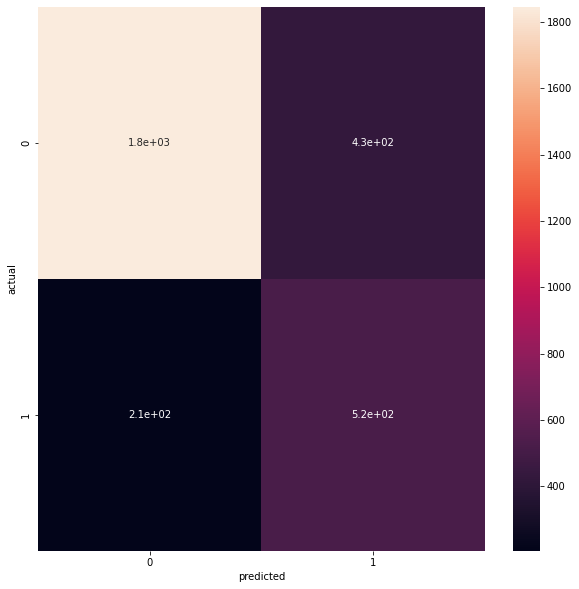

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,prediction)
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')
